In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0


In [2]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found e

In [3]:
# -*- coding: utf-8 -*-
"""Sentiment analysis using CNN on financial news"""

# Install required libraries
!pip install contractions

# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import nltk
import tqdm
import unicodedata
import contractions
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.6 MB/s eta 0:00:00


In [4]:
!pip install nltk

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Load and preprocess data
df = pd.read_csv('./all-data.csv', delimiter=',', encoding='latin-1', header=None)
df = df.rename(columns=lambda x: ['Sentiment', 'Sentence'][x])
df = df[['Sentence', 'Sentiment']]
df = df[df.Sentiment != "neutral"]


In [9]:
df.head()

,Sentence,Sentiment
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive
6,"For the last quarter of 2010 , Componenta 's n...",positive


In [44]:

# !pip install newspaper3k
import newspaper
# Create a newspaper article object
article = newspaper.Article('https://www.chinadaily.com.cn/a/202403/29/WS66068ae1a31082fc043bf7a9.html')

# Download the article
article.download()

# Parse the article
article.parse()

# Get the article text
text = article.text

print(text)

A panel discussion themed on "Digital Economy in Integration and Innovation" is held during the Boao Forum for Asia (BFA) Annual Conference 2024 in Boao, South China's Hainan province, March 28, 2024. [Photo/Xinhua]

BOAO, Hainan - While highlighting the remarkable achievements unlocked by the Belt and Road Initiative (BRI), participants at the Boao Forum for Asia (BFA) Annual Conference 2024 also called on participating countries to strengthen cooperation in technological innovation and the digital economy.

Since its inception in 2013, the China-proposed BRI has reaped substantial benefits from deepening the "hard connectivity" of infrastructure and the "soft connectivity" of technology, to coordination of standards and rules in its participating countries, said attendees at a panel discussion on high-quality Belt and Road cooperation on Friday.

The BRI has launched thousands of projects in around 150 countries and regions over the past years, providing financial and technological a

In [40]:

import newspaper
# Create a newspaper article object
article = newspaper.Article('https://www.chinadaily.com.cn/a/202403/29/WS66068ae1a31082fc043bf7a9.html')

# Download the article
article.download()

# Parse the article
article.parse()

# Get the article text
text = article.text

# Save the article text to a file
with open('financial_news.csv', 'w') as f:
  f.write(text)
# Data cleaning
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

def pre_process_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        # Case folding
        doc = doc.lower()
        # Remove special characters and whitespaces
        doc = strip_html_tags(doc)
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))
        doc = remove_accented_chars(doc)
        doc = contractions.fix(doc)
        doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()
        # Tokenize
        doc = word_tokenize(doc)
        # Filtering
        doc = stopwords_removal(doc)
        norm_docs.append(doc)

    norm_docs = [" ".join(word) for word in norm_docs]
    return norm_docs

df.Sentence = pre_process_corpus(df.Sentence)


100%|██████████| 1967/1967 [00:00<00:00, 1967.31it/s]


Epoch 1/100
550/552 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5353 - loss: 0.6925
Epoch 1: val_accuracy improved from -inf to 0.68293, saving model to ./best_model/sentiment_analysis.keras
552/552 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.5355 - loss: 0.6925 - val_accuracy: 0.6829 - val_loss: 0.6832
Epoch 2/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7298 - loss: 0.6678
Epoch 2: val_accuracy improved from 0.68293 to 0.70732, saving model to ./best_model/sentiment_analysis.keras
552/552 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.7298 - loss: 0.6678 - val_accuracy: 0.7073 - val_loss: 0.6394
Epoch 3/100
551/552 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8222 - loss: 0.5749
Epoch 3: val_accuracy improved from 0.70732 to 0.88211, saving model to ./best_model/sentiment_analysis.keras
552/552 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8223 - loss: 0.5747 - val_accuracy: 0.8821 - val_loss: 0.4983
Epoch 4/100
551/552 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/ste

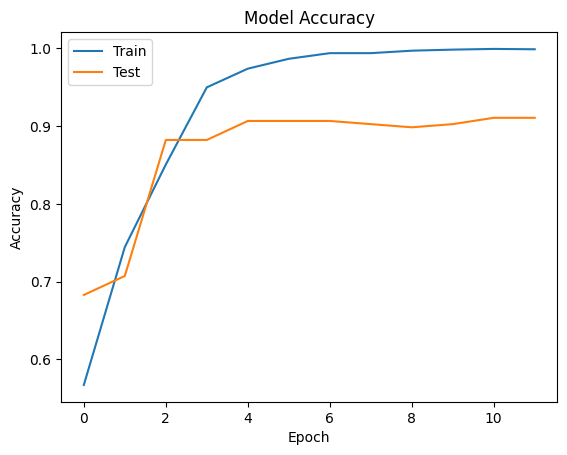

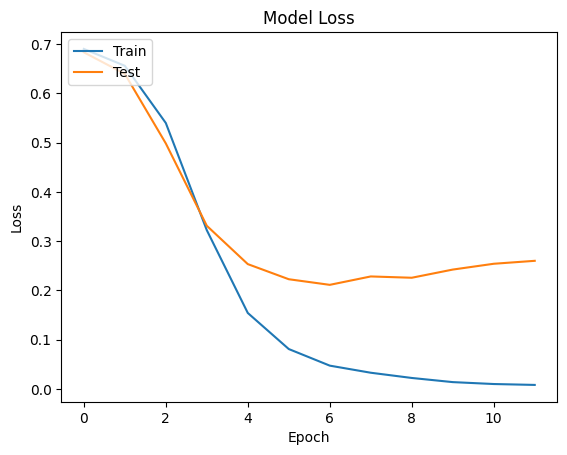

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN 1D Accuracy: 90.48%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
CNN 1D Precision: 90.93%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
CNN 1D Recall: 90.81%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
CNN 1D f1_score: 90.48%

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       129
           1       0.97      0.85      0.90       144

    accuracy                           0.90       273
   macro avg       0.91      0.91      0.90       273
weighted avg       0.91      0.90      0.90       273

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Model AUC score: 90.81%


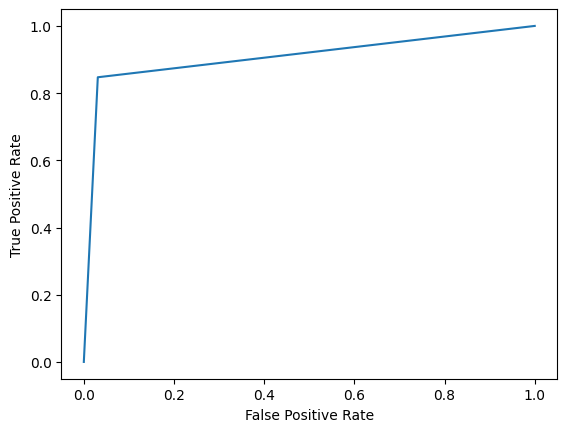

In [41]:
# Handle imbalanced data (oversampling)
data_majority = df[df['Sentiment'] == "positive"]
data_minority = df[df['Sentiment'] == "negative"]

data_minority_upsampled = resample(data_minority,
                                   replace=True,
                                   n_samples=data_majority.shape[0],
                                   random_state=123)

df_balance = pd.concat([data_majority, data_minority_upsampled])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_balance.Sentence, df_balance.Sentiment, test_size=0.1, random_state=42)

# Tokenize and pad sequences
token = Tokenizer()
token.fit_on_texts(X_train)
vocab = len(token.index_word) + 1

X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

MAX_SEQUENCE_LENGTH = 30
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding="post")

# Encode labels
le = LabelEncoder()
num_classes = 2
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Build CNN model
vec_size = 300
model = Sequential()
model.add(Embedding(vocab, vec_size))
model.add(Conv1D(64, 8, activation="relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train model
epochs = 100
batch_size = 4

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./best_model/sentiment_analysis.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, batch_size=batch_size, shuffle=True, validation_split=0.1, epochs=epochs, verbose=1, callbacks=[es, mc])

# Evaluate model
train_acc = model.evaluate(X_train, y_train, verbose=1)
test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.2f%%, Test: %.2f%%' % (train_acc[1]*100, test_acc[1]*100))

# Identify overfitting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion matrix
def predictions(x):
    prediction_probs = model.predict(x)
    predictions = [1 if prob > 0.5 else 0 for prob in prediction_probs]
    return predictions

labels = ['positive', 'negative']
print("CNN 1D Accuracy: %.2f%%" % (accuracy_score(y_test, predictions(X_test))*100))
print("CNN 1D Precision: %.2f%%" % (precision_score(y_test, predictions(X_test), average="macro")*100))
print("CNN 1D Recall: %.2f%%" % (recall_score(y_test, predictions(X_test), average="macro")*100))
print("CNN 1D f1_score: %.2f%%" % (f1_score(y_test, predictions(X_test), average="macro")*100))
print('================================================\n')
print(classification_report(y_test, predictions(X_test)))
pd.DataFrame(confusion_matrix(y_test, predictions(X_test)), index=labels, columns=labels)

# ROC AUC
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, predictions(X_test))
print("Model AUC score: %.2f%%" % (roc_auc_score(y_test, predictions(X_test))*100))

# Save the trained model
model.save('sentiment_analysis_model.h5')

In [43]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define sentiment thresholds (modify these values if needed)
POSITIVE_THRESHOLD = 0.5
NEGATIVE_THRESHOLD = 1 - POSITIVE_THRESHOLD  # Threshold for negative sentiment

# Load the saved model
model = load_model('/content/sentiment_analysis_model.h5')

# Define sample text
sample_text = []
with open('/content/financial_news.csv', 'r') as file:
  for line in file:
    sample_text.append(line)


# Create tokenizer and fit on sample text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sample_text)

# Define maximum sequence length based on your model's configuration (replace with actual value)
MAX_SEQUENCE_LENGTH = 100  # Replace with appropriate value

# Preprocess sample text
sample_sequences = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")

# Predict sentiment
predictions = model.predict(sample_padded)

# Print results
for i, prediction in enumerate(predictions):
  if prediction > POSITIVE_THRESHOLD:
    print(f"Sample {i+1}: Positive")
  elif prediction > NEGATIVE_THRESHOLD:
    print(f"Sample {i+1}: Neutral")
  else:
    print(f"Sample {i+1}: Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Sample 1: Negative
Sample 2: Negative
Sample 3: Positive
Sample 4: Negative
Sample 5: Positive
Sample 6: Negative
Sample 7: Positive
Sample 8: Negative
Sample 9: Negative
Sample 10: Negative
Sample 11: Positive
Sample 12: Negative
Sample 13: Positive
Sample 14: Negative
Sample 15: Positive
Sample 16: Negative
Sample 17: Positive
Sample 18: Negative
Sample 19: Negative
Sample 20: Negative
Sample 21: Positive
Sample 22: Negative
Sample 23: Positive
Sample 24: Negative
Sample 25: Negative
